# 기본 케라스 구조 및 학습과정

### 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

### 1. 데이터셋 생성하기
* 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성합니다.
* 데이터로부터 훈련셋, 검증셋, 시험셋을 생성합니다.
* 이 때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환을 합니다.

#### 1.1 훈련셋과 시험셋 로딩

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]        
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
print('X_train', X_train.shape)
print('X_train', Y_train.shape)
print('X_train', X_val.shape)
print('X_train', Y_val.shape)

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

X_train (50000, 28, 28)
X_train (50000,)
X_train (10000, 28, 28)
X_train (10000,)


#### 1.2 훈련셋, 검증셋 고르기

In [3]:
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

#### 1.3 라벨 데이터 원핫인코딩 처리

In [4]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

### 2. 모델 구성하기
* 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성합니다.
* 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용합니다.

In [5]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기
* 학습하기 전에 학습에 대한 설정을 수행합니다.
* 손실 함수 및 최적화 방법을 정의합니다.
* 케라스에서는 compile() 함수를 사용합니다.

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기
* 훈련셋을 이용하여 구성한 모델로 학습시킵니다.
* 케라스에서는 fit() 함수를 사용합니다.
#### 4.1 배치사이즈
* 몇 개를  처리하고 해답을 맞추는지를 의미함 
    * 100 : 100개를 처리하고 해답을 맞춤
    * 1: 1개를 처리하고 해답을 맞춤
* 배치사이즈가 작을수록 갱신이 자주 발생함 
#### 4.2 에폭
* 같은 데이터셋으로 반복적으로 가중치를 갱신하면서 학습
* 서로 다른 20문제를 1번 푸는 경우보다 같은 1문제를 20번 푸는 경우 정확도가 높다.

In [7]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 863us/sample - loss: 2.0943 - accuracy: 0.3229 - val_loss: 1.8196 - val_accuracy: 0.5200
Epoch 2/1000
700/700 [==============================] - 0s 225us/sample - loss: 1.6207 - accuracy: 0.6114 - val_loss: 1.4456 - val_accuracy: 0.6533
Epoch 3/1000
700/700 [==============================] - 0s 225us/sample - loss: 1.2658 - accuracy: 0.7100 - val_loss: 1.1702 - val_accuracy: 0.6933
Epoch 4/1000
700/700 [==============================] - 0s 231us/sample - loss: 1.0268 - accuracy: 0.7571 - val_loss: 1.0025 - val_accuracy: 0.7300
Epoch 5/1000
700/700 [==============================] - 0s 204us/sample - loss: 0.8638 - accuracy: 0.7986 - val_loss: 0.8610 - val_accuracy: 0.7767
Epoch 6/1000
700/700 [==============================] - 0s 207us/sample - loss: 0.7519 - accuracy: 0.8343 - val_loss: 0.7909 - val_accuracy: 0.7800
Epoch 7/1000
700/700 [==============================] - 0s 215us/s

Epoch 56/1000
700/700 [==============================] - 0s 208us/sample - loss: 0.0871 - accuracy: 0.9943 - val_loss: 0.4812 - val_accuracy: 0.8433
Epoch 57/1000
700/700 [==============================] - 0s 209us/sample - loss: 0.0846 - accuracy: 0.9957 - val_loss: 0.4817 - val_accuracy: 0.8433
Epoch 58/1000
700/700 [==============================] - 0s 197us/sample - loss: 0.0831 - accuracy: 0.9971 - val_loss: 0.4809 - val_accuracy: 0.8433
Epoch 59/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0805 - accuracy: 0.9986 - val_loss: 0.4822 - val_accuracy: 0.8467
Epoch 60/1000
700/700 [==============================] - 0s 175us/sample - loss: 0.0787 - accuracy: 0.9986 - val_loss: 0.4793 - val_accuracy: 0.8500
Epoch 61/1000
700/700 [==============================] - 0s 191us/sample - loss: 0.0766 - accuracy: 0.9971 - val_loss: 0.4874 - val_accuracy: 0.8433
Epoch 62/1000
700/700 [==============================] - 0s 221us/sample - loss: 0.0749 - accuracy: 0.9971

Epoch 111/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.5217 - val_accuracy: 0.8433
Epoch 112/1000
700/700 [==============================] - 0s 189us/sample - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.5207 - val_accuracy: 0.8400
Epoch 113/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.5231 - val_accuracy: 0.8433
Epoch 114/1000
700/700 [==============================] - 0s 195us/sample - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.5219 - val_accuracy: 0.8433
Epoch 115/1000
700/700 [==============================] - 0s 177us/sample - loss: 0.0285 - accuracy: 1.0000 - val_loss: 0.5247 - val_accuracy: 0.8433
Epoch 116/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.5248 - val_accuracy: 0.8467
Epoch 117/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0278 - accuracy:

700/700 [==============================] - 0s 187us/sample - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.5515 - val_accuracy: 0.8467
Epoch 166/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.5521 - val_accuracy: 0.8467
Epoch 167/1000
700/700 [==============================] - 0s 225us/sample - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.5525 - val_accuracy: 0.8467
Epoch 168/1000
700/700 [==============================] - 0s 239us/sample - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.5527 - val_accuracy: 0.8500
Epoch 169/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.5534 - val_accuracy: 0.8467
Epoch 170/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.5539 - val_accuracy: 0.8467
Epoch 171/1000
700/700 [==============================] - 0s 185us/sample - loss: 0.0157 - accuracy: 1.0000 - val_l

Epoch 220/1000
700/700 [==============================] - 0s 199us/sample - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.5738 - val_accuracy: 0.8500
Epoch 221/1000
700/700 [==============================] - 0s 188us/sample - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.5732 - val_accuracy: 0.8500
Epoch 222/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.5739 - val_accuracy: 0.8500
Epoch 223/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.5752 - val_accuracy: 0.8467
Epoch 224/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.5752 - val_accuracy: 0.8533
Epoch 225/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.5755 - val_accuracy: 0.8533
Epoch 226/1000
700/700 [==============================] - 0s 185us/sample - loss: 0.0105 - accuracy:

700/700 [==============================] - 0s 184us/sample - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.5912 - val_accuracy: 0.8500
Epoch 275/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.5916 - val_accuracy: 0.8500
Epoch 276/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.5916 - val_accuracy: 0.8500
Epoch 277/1000
700/700 [==============================] - 0s 187us/sample - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.5920 - val_accuracy: 0.8500
Epoch 278/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.5923 - val_accuracy: 0.8500
Epoch 279/1000
700/700 [==============================] - 0s 199us/sample - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.5926 - val_accuracy: 0.8500
Epoch 280/1000
700/700 [==============================] - 0s 191us/sample - loss: 0.0078 - accuracy: 1.0000 - val_l

Epoch 329/1000
700/700 [==============================] - 0s 228us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.6061 - val_accuracy: 0.8500
Epoch 330/1000
700/700 [==============================] - 0s 208us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.6062 - val_accuracy: 0.8500
Epoch 331/1000
700/700 [==============================] - 0s 218us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.6061 - val_accuracy: 0.8500
Epoch 332/1000
700/700 [==============================] - 0s 227us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6063 - val_accuracy: 0.8500
Epoch 333/1000
700/700 [==============================] - 0s 192us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6067 - val_accuracy: 0.8500
Epoch 334/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6068 - val_accuracy: 0.8500
Epoch 335/1000
700/700 [==============================] - 0s 205us/sample - loss: 0.0061 - accuracy:

700/700 [==============================] - 0s 181us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6182 - val_accuracy: 0.8500
Epoch 384/1000
700/700 [==============================] - 0s 197us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6187 - val_accuracy: 0.8500
Epoch 385/1000
700/700 [==============================] - 0s 205us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6188 - val_accuracy: 0.8500
Epoch 386/1000
700/700 [==============================] - 0s 209us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6191 - val_accuracy: 0.8500
Epoch 387/1000
700/700 [==============================] - 0s 232us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6193 - val_accuracy: 0.8500
Epoch 388/1000
700/700 [==============================] - 0s 207us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 0.8500
Epoch 389/1000
700/700 [==============================] - 0s 211us/sample - loss: 0.0050 - accuracy: 1.0000 - val_l

Epoch 438/1000
700/700 [==============================] - 0s 192us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6295 - val_accuracy: 0.8500
Epoch 439/1000
700/700 [==============================] - 0s 185us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6296 - val_accuracy: 0.8500
Epoch 440/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6298 - val_accuracy: 0.8500
Epoch 441/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6301 - val_accuracy: 0.8500
Epoch 442/1000
700/700 [==============================] - 0s 188us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6301 - val_accuracy: 0.8500
Epoch 443/1000
700/700 [==============================] - 0s 191us/sample - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6304 - val_accuracy: 0.8500
Epoch 444/1000
700/700 [==============================] - 0s 195us/sample - loss: 0.0042 - accuracy:

700/700 [==============================] - 0s 184us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6388 - val_accuracy: 0.8500
Epoch 493/1000
700/700 [==============================] - 0s 197us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6389 - val_accuracy: 0.8500
Epoch 494/1000
700/700 [==============================] - 0s 191us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6391 - val_accuracy: 0.8500
Epoch 495/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6395 - val_accuracy: 0.8500
Epoch 496/1000
700/700 [==============================] - 0s 195us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6397 - val_accuracy: 0.8500
Epoch 497/1000
700/700 [==============================] - 0s 198us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6397 - val_accuracy: 0.8500
Epoch 498/1000
700/700 [==============================] - 0s 187us/sample - loss: 0.0036 - accuracy: 1.0000 - val_l

Epoch 547/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6478 - val_accuracy: 0.8533
Epoch 548/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6479 - val_accuracy: 0.8533
Epoch 549/1000
700/700 [==============================] - 0s 185us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6481 - val_accuracy: 0.8533
Epoch 550/1000
700/700 [==============================] - 0s 189us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6483 - val_accuracy: 0.8533
Epoch 551/1000
700/700 [==============================] - 0s 187us/sample - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.6484 - val_accuracy: 0.8533
Epoch 552/1000
700/700 [==============================] - 0s 185us/sample - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.6485 - val_accuracy: 0.8533
Epoch 553/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0031 - accuracy:

700/700 [==============================] - 0s 180us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6556 - val_accuracy: 0.8533
Epoch 602/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6558 - val_accuracy: 0.8533
Epoch 603/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6559 - val_accuracy: 0.8533
Epoch 604/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6560 - val_accuracy: 0.8533
Epoch 605/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6561 - val_accuracy: 0.8533
Epoch 606/1000
700/700 [==============================] - 0s 185us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6562 - val_accuracy: 0.8533
Epoch 607/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0028 - accuracy: 1.0000 - val_l

Epoch 656/1000
700/700 [==============================] - 0s 187us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6626 - val_accuracy: 0.8533
Epoch 657/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6627 - val_accuracy: 0.8533
Epoch 658/1000
700/700 [==============================] - 0s 190us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6628 - val_accuracy: 0.8533
Epoch 659/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6630 - val_accuracy: 0.8533
Epoch 660/1000
700/700 [==============================] - 0s 188us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6631 - val_accuracy: 0.8533
Epoch 661/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6633 - val_accuracy: 0.8533
Epoch 662/1000
700/700 [==============================] - 0s 191us/sample - loss: 0.0025 - accuracy:

700/700 [==============================] - 0s 184us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6692 - val_accuracy: 0.8533
Epoch 711/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6693 - val_accuracy: 0.8533
Epoch 712/1000
700/700 [==============================] - 0s 187us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6694 - val_accuracy: 0.8533
Epoch 713/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6695 - val_accuracy: 0.8533
Epoch 714/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6696 - val_accuracy: 0.8533
Epoch 715/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6698 - val_accuracy: 0.8533
Epoch 716/1000
700/700 [==============================] - 0s 191us/sample - loss: 0.0022 - accuracy: 1.0000 - val_l

Epoch 765/1000
700/700 [==============================] - 0s 191us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6753 - val_accuracy: 0.8533
Epoch 766/1000
700/700 [==============================] - 0s 204us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6754 - val_accuracy: 0.8533
Epoch 767/1000
700/700 [==============================] - 0s 192us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6755 - val_accuracy: 0.8533
Epoch 768/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6756 - val_accuracy: 0.8533
Epoch 769/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6756 - val_accuracy: 0.8533
Epoch 770/1000
700/700 [==============================] - 0s 187us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6758 - val_accuracy: 0.8533
Epoch 771/1000
700/700 [==============================] - 0s 189us/sample - loss: 0.0020 - accuracy:

700/700 [==============================] - 0s 184us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6810 - val_accuracy: 0.8533
Epoch 820/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6811 - val_accuracy: 0.8533
Epoch 821/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6812 - val_accuracy: 0.8533
Epoch 822/1000
700/700 [==============================] - 0s 187us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6813 - val_accuracy: 0.8533
Epoch 823/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6814 - val_accuracy: 0.8533
Epoch 824/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6815 - val_accuracy: 0.8533
Epoch 825/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0019 - accuracy: 1.0000 - val_l

Epoch 874/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6865 - val_accuracy: 0.8533
Epoch 875/1000
700/700 [==============================] - 0s 177us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6866 - val_accuracy: 0.8533
Epoch 876/1000
700/700 [==============================] - 0s 174us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6866 - val_accuracy: 0.8533
Epoch 877/1000
700/700 [==============================] - 0s 180us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6868 - val_accuracy: 0.8533
Epoch 878/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6868 - val_accuracy: 0.8533
Epoch 879/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6869 - val_accuracy: 0.8533
Epoch 880/1000
700/700 [==============================] - 0s 182us/sample - loss: 0.0017 - accuracy:

700/700 [==============================] - 0s 182us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6915 - val_accuracy: 0.8533
Epoch 929/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6916 - val_accuracy: 0.8533
Epoch 930/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6916 - val_accuracy: 0.8533
Epoch 931/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6917 - val_accuracy: 0.8533
Epoch 932/1000
700/700 [==============================] - 0s 175us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6918 - val_accuracy: 0.8533
Epoch 933/1000
700/700 [==============================] - 0s 181us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6919 - val_accuracy: 0.8533
Epoch 934/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0016 - accuracy: 1.0000 - val_l

Epoch 983/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6962 - val_accuracy: 0.8533
Epoch 984/1000
700/700 [==============================] - 0s 184us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6963 - val_accuracy: 0.8533
Epoch 985/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6964 - val_accuracy: 0.8533
Epoch 986/1000
700/700 [==============================] - 0s 177us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6965 - val_accuracy: 0.8533
Epoch 987/1000
700/700 [==============================] - 0s 185us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6965 - val_accuracy: 0.8533
Epoch 988/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6966 - val_accuracy: 0.8533
Epoch 989/1000
700/700 [==============================] - 0s 178us/sample - loss: 0.0015 - accuracy:

### 5. 학습과정 그래프로 확인 
* 히스토리 객체 생성 
    * 매 에포크 마다의 훈련 손실값 (loss)
    * 매 에포크 마다의 훈련 정확도 (acc)
    * 에포크 마다의 검증 손실값 (val_loss)
    * 에포크 마다의 검증 정확도 (val_acc)

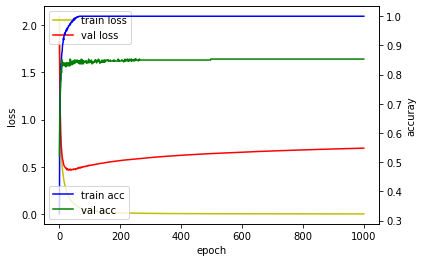

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 학습과정 살펴보기
* 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다.
* 반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.

In [9]:
print('## training loss and accuracy ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and accuracy ##
[2.094333384718214, 1.6206669415746415, 1.265817721400942, 1.0268088792051588, 0.8637722487960543, 0.7518548714263099, 0.6639163249305317, 0.60365726181439, 0.548935664338725, 0.5093365945986339, 0.4701830217880862, 0.43842070017542156, 0.41534744181803296, 0.387991143230881, 0.36898505889943667, 0.34972150921821593, 0.3327591172818627, 0.31652836474989143, 0.30433943260993274, 0.289253520326955, 0.27648831659129686, 0.263886878320149, 0.2556346504815987, 0.2434970013265099, 0.23487781834389482, 0.22537463270127772, 0.2176638954452106, 0.20797166983996118, 0.20314245814723628, 0.1952360065387828, 0.18653059351657117, 0.18165873794683388, 0.17483686065035206, 0.168954823538661, 0.16274823030190808, 0.15773739692355906, 0.15287050024739335, 0.14771598439131464, 0.14335842435913426, 0.13936555510652918, 0.1345637387995209, 0.13140704073011875, 0.12674353854464634, 0.12235806531139783, 0.11950114624840873, 0.11538613749934094, 0.11156859134456941, 0.1094896

### 7. 모델 평가하기
* 준비된 시험셋으로 학습한 모델을 평가합니다.
* 케라스에서는 evaluate() 함수를 사용합니다.

In [10]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.5471 - accuracy: 0.8798
## evaluation loss and_metrics ##
[0.5470691438039764, 0.8798]


### 8. 모델 사용하기
* 임의의 입력으로 모델의 출력을 얻습니다.
* 케라스에서는 predict() 함수를 사용합니다.

In [11]:
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[3.7283603e-09 5.7813845e-13 2.7963407e-09 7.2410611e-09 2.8661476e-11
  4.2531459e-10 6.6161357e-14 9.9999976e-01 5.0808435e-10 2.5218134e-07]]


### 9. 러닝 모델 가시화 기능 확인

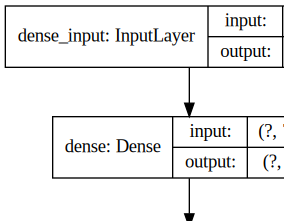

In [12]:
import pydot
import graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 10. 모델 저장과 모델 로딩 

In [13]:
from tensorflow.keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')